# Part 1

In [1]:
from cluster import * 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### Create blobs

In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

### Normalize X

In [3]:
ss = StandardScaler()
ss.fit(X[:, 0:])
transformed_X = ss.transform(X[:, 0:])

## Fit my KMeans implementation

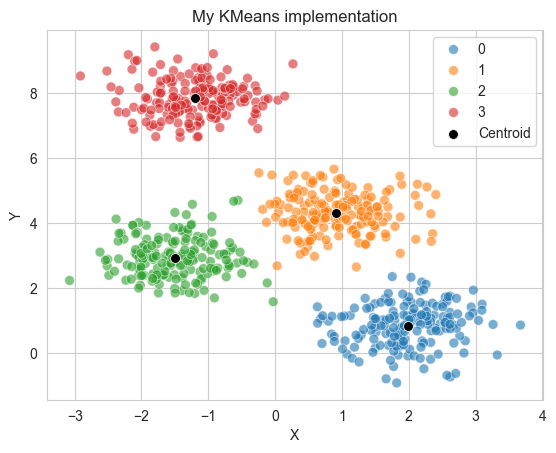

In [9]:


my_kmeans = My_KMeans(k=4)
my_cluster_assignments, centroids =  my_kmeans.fit(transformed_X)

my_centroids = ss.inverse_transform(centroids)

my_df = pd.DataFrame(X)
my_centroids_df = pd.DataFrame(my_centroids)
sns.scatterplot(data=my_df, x=my_df[0], y=my_df[1], hue=my_cluster_assignments, s=50, alpha=0.6, palette='tab10')
sns.scatterplot(data = my_centroids_df, x=my_centroids_df[0], y=my_centroids_df[1], s=50, color='black', label='Centroid')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('My KMeans implementation')
plt.show()

### Comparing the blobs to my kmeans clustering 

The inertias:

In [6]:
norm_blob_centroids = compute_centroids(transformed_X, cluster_assignments, 4)
blob_inertia = calc_inertia(transformed_X, cluster_assignments, norm_blob_centroids)

print("My inertia: " + str(my_kmeans.intertia_))
print("Blob inerita: " + str(blob_inertia))

My inertia: 129.34159347638655
Blob inerita: 130.9583261363236


The centroids of the blobs:

In [14]:
blob_centroids = pd.DataFrame(compute_centroids(X, cluster_assignments, 4))
blob_centroids

,0,1
0,0.903438,4.329549
1,1.987706,0.831886
2,-1.488993,2.906461
3,-1.204058,7.837858


The centroids of my clustering:

In [10]:
my_centroids_df

,0,1
0,1.987706,0.831886
1,0.912468,4.308655
2,-1.498023,2.927355
3,-1.204058,7.837858


My clustering algorithm captures the blobs almost perfectly. The inertias are very close, and the centroids of the clusters are almost the exact centroids of the blobs. 

## SKLearn Kmeans

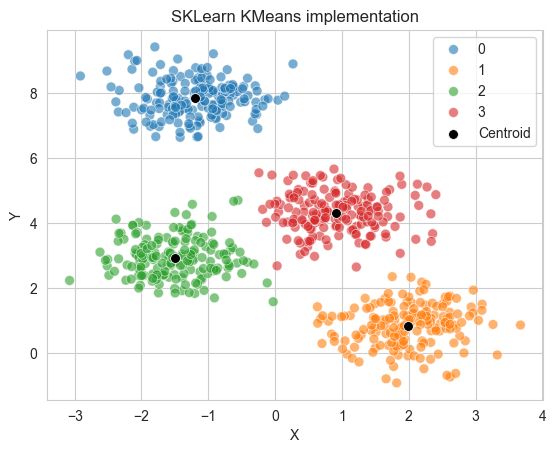

In [11]:
sk_kmeans = KMeans(n_clusters=4)
sk_kmeans.fit(transformed_X)

centroids = ss.inverse_transform(sk_kmeans.cluster_centers_)

sk_df = pd.DataFrame(X)
sk_centroid_df = pd.DataFrame(centroids)

sns.scatterplot(data=sk_df, x=sk_df[0], y=sk_df[1], hue=sk_kmeans.labels_, s=50, alpha=0.6, palette='tab10')
sns.scatterplot(data = sk_centroid_df, x=sk_centroid_df[0], y=sk_centroid_df[1], s=50, color='black', label='Centroid')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('SKLearn KMeans implementation')
plt.show()

### Comparing the blobs to my kmeans clustering 

The inertias:

In [15]:
print("SKLearn's inertia: " + str(sk_kmeans.inertia_))
print("Blob inerita: " + str(blob_inertia))

SKLearn's inertia: 129.34159347638655
Blob inerita: 130.9583261363236


Centroids of the blobs:

In [16]:
blob_centroids

,0,1
0,0.903438,4.329549
1,1.987706,0.831886
2,-1.488993,2.906461
3,-1.204058,7.837858


Centroids of SKLearn clustering:

In [17]:
sk_centroid_df

,0,1
0,-1.204058,7.837858
1,1.987706,0.831886
2,-1.498023,2.927355
3,0.912468,4.308655


The SKLearn clustering performs identically to my implementation.

## Report

1. My implementation's hypothesis are correct. It captures two blobs exactly: (1.987706, 0.831886) and (-1.204058, 7.837858) and (1.987706, 0.831886), and one blob almost exactly: prediction of (0.912468, 4.308655) vs the blob (0.903438, 4.329549).
2. My implementation performs identically to SKLearn's implementation

# Part 2

## Taxi Trips

### EDA

In [2]:
taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
taxi_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [3]:
location_df = taxi_df.loc[:, ['Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]

location_df = location_df.dropna()

In [6]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89484 entries, 1 to 101786
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pickup Centroid Latitude    89484 non-null  float64
 1   Pickup Centroid Longitude   89484 non-null  float64
 2   Dropoff Centroid Latitude   89484 non-null  float64
 3   Dropoff Centroid Longitude  89484 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB


In [7]:
location_df.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,89484.000000,89484.000000,89484.000000,89484.000000
mean,41.896566,-87.681973,41.891761,-87.657158
std,0.062736,0.097758,0.059318,0.063017
min,41.660136,-87.913625,41.660136,-87.913625
25%,41.878866,-87.670167,41.878866,-87.663518
50%,41.892508,-87.633973,41.892508,-87.633308
75%,41.944227,-87.625192,41.922686,-87.625192
max,42.015934,-87.534903,42.021224,-87.534903


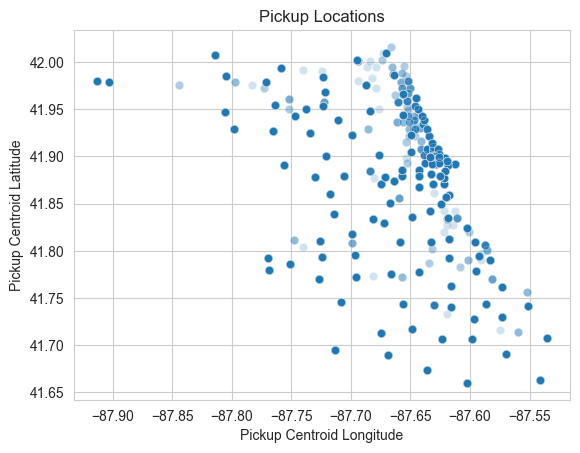

In [43]:
sns.scatterplot(data=location_df, x=location_df['Pickup Centroid Longitude'], y=location_df['Pickup Centroid Latitude'], alpha=.2)

plt.title('Pickup Locations')
plt.show()

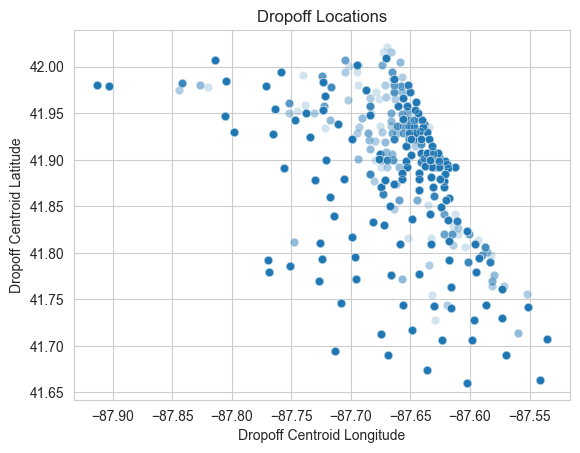

In [44]:
sns.scatterplot(data=location_df, x=location_df['Dropoff Centroid Longitude'], y=location_df['Dropoff Centroid Latitude'], alpha=.2)

plt.title('Dropoff Locations')
plt.show()

### DBSCAN

In [4]:
ss = StandardScaler()
ss.fit(location_df.iloc[:, 0:])
transformed_location_df = ss.transform(location_df.iloc[:, 0:])

Source for below code: https://medium.com/@revag2014/dbscan-an-easy-clustering-algorithm-and-also-how-to-optimize-it-using-grid-search-69a382b63e85

In [11]:

def get_dbscan_params(df, eps_range, min_samples_range):

    best_params = None
    best_score = -1  
    count = 0
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
            score = silhouette_score(df, dbscan.labels_)
        
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
            print(count, end=" ")
            count += 1

    print("Best parameters:", best_params)
    print("Best silhouette score:", best_score)

In [ ]:
dbscan_location = DBSCAN(eps=.3, min_samples=10)
dbscan_location.fit(transformed_location_df)

In [12]:
silhouette_score(transformed_location_df, dbscan_location.labels_)

0.1929159119374482

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


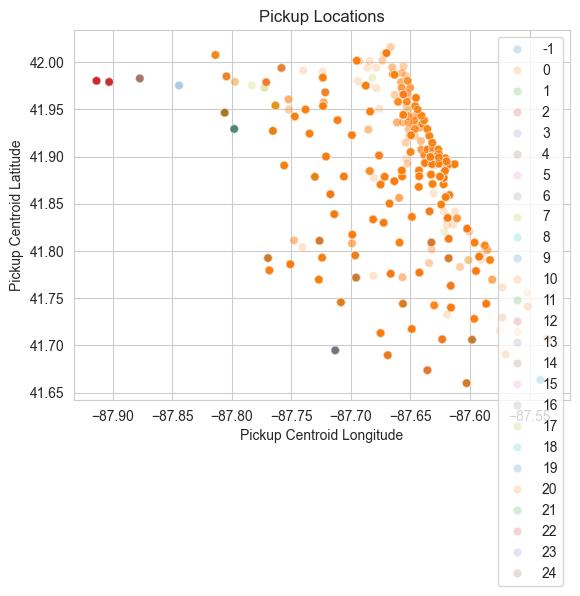

In [19]:
sns.scatterplot(data=location_df, x=location_df['Pickup Centroid Longitude'], y=location_df['Pickup Centroid Latitude'], alpha=.2, hue=dbscan_location.labels_, palette="tab10")

plt.title('Pickup Locations')
plt.show()

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


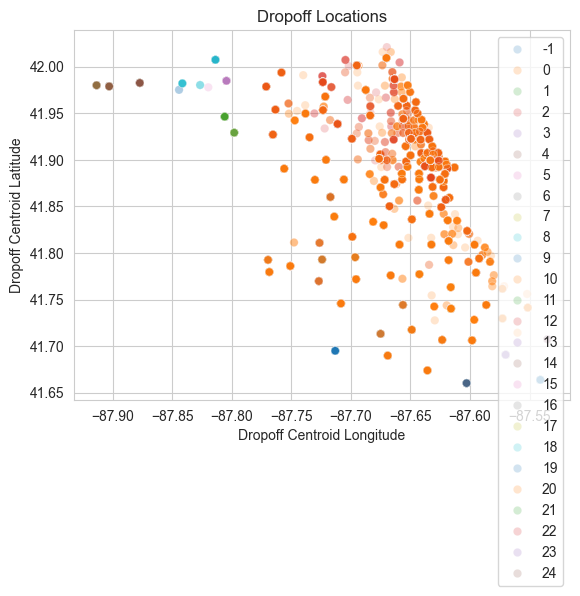

In [20]:
sns.scatterplot(data=location_df, x=location_df['Dropoff Centroid Longitude'], y=location_df['Dropoff Centroid Latitude'], alpha=.2, hue=dbscan_location.labels_, palette="tab10")

plt.title('Dropoff Locations')
plt.show()

### KMeans

In [5]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

for k in range(2, 20):
    location_kmeans = KMeans(n_clusters=k)
    location_kmeans.fit(transformed_location_df)
    inertias.loc[k] = location_kmeans.inertia_

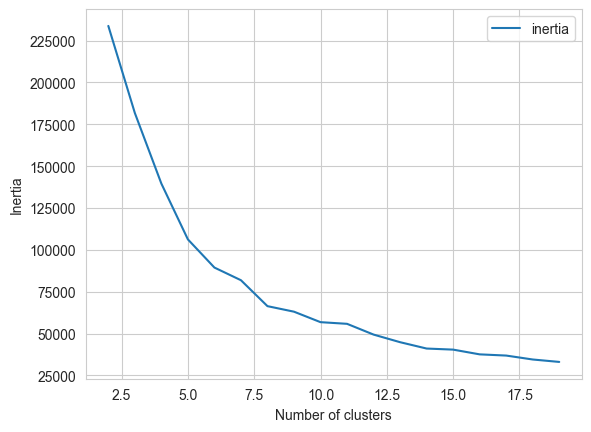

In [7]:
inertias.plot()
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [7]:
location_kmeans = KMeans(n_clusters=7)
location_kmeans.fit(transformed_location_df)

KMeans(n_clusters=7)

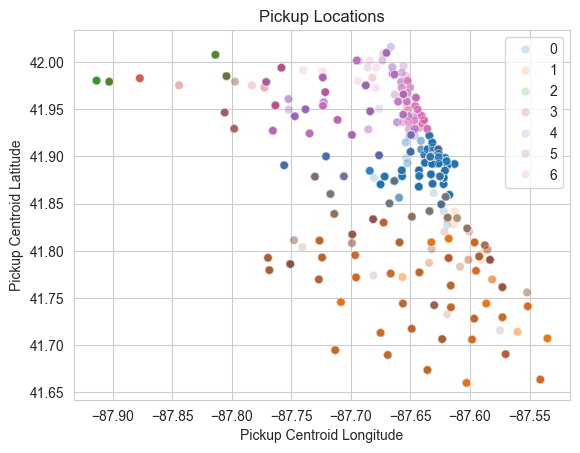

In [9]:
sns.scatterplot(data=location_df, x=location_df['Pickup Centroid Longitude'], y=location_df['Pickup Centroid Latitude'], alpha=.2, hue=location_kmeans.labels_, palette="tab10")

plt.title('Pickup Locations')
plt.show()

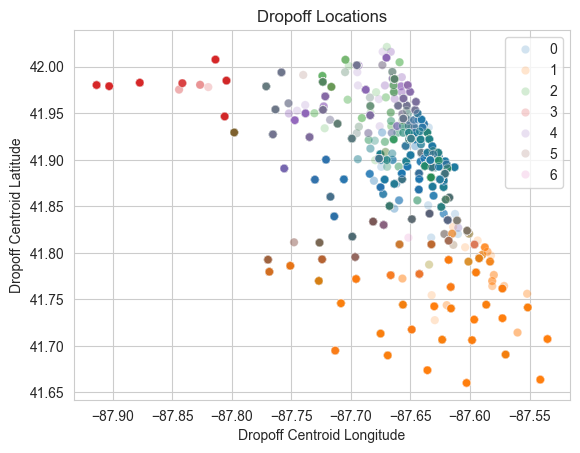

In [8]:
sns.scatterplot(data=location_df, x=location_df['Dropoff Centroid Longitude'], y=location_df['Dropoff Centroid Latitude'], alpha=.2, hue=location_kmeans.labels_, palette="tab10")

plt.title('Dropoff Locations')
plt.show()

In [12]:
silhouette_score(location_df, location_kmeans.labels_)

0.4500882514953223

1. I choose KMeans for clustering the taxi data. I originally attempted to use DBSCAN and use a grid search to tune the hyperparams, but the algorithm was taking too long to run. The one DBSCAN model that I did fit did not perform well. It found 25 clusters which made it too complicated to pick up on patterns visually. The final kmeans model used 7 clusters.
2. I removed all features but the location of the pickups and dropoffs, and removed rows with NAs in them to focus the data on only rides that took place in Chicago. The number of clusters was determined after fitting models with clusters ranging from 2 to 20 and using the elbow method on the graph of the interitas.
3. The first cluster appears to be rides that mainly took place in the middle of the city. Riders were picked up and dropped off in the same area. The second cluster grouped riders who were picked up and dropped off in the bottom of the city. The third cluster consists of riders picked up in the upper left of the graph and dropped off in the middle of the city. The fourth appears to be the opposite of the third. The rides in the fifth group took place mainly at the top of the city. The sixth appears to be in between the second and the first. The seventh appears to be picked up from the top of the city and dropped off in the outskirts.
4. I used silhouette score to evaluate the performance. The kmeans cluster had a silhouette score of .45 which indicates a fair clustering. The score of the DBSCAN model was .19, indicating that the kmeans was a better fit than the DBSCAN model.

## Mopsi Data

In [68]:
mopsi_df = pd.read_csv('MopsiLocationsUntil2012-Finland.tsv', sep='\t', header=None)
mopsi_df.columns = ["Latitude", "Longitude"]

In [69]:
mopsi_df

,Latitude,Longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [63]:
mopsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       13467 non-null  int64
 1   1       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


In [70]:
mopsi_df.describe()

,Latitude,Longitude
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


<Axes: xlabel='Latitude', ylabel='Longitude'>

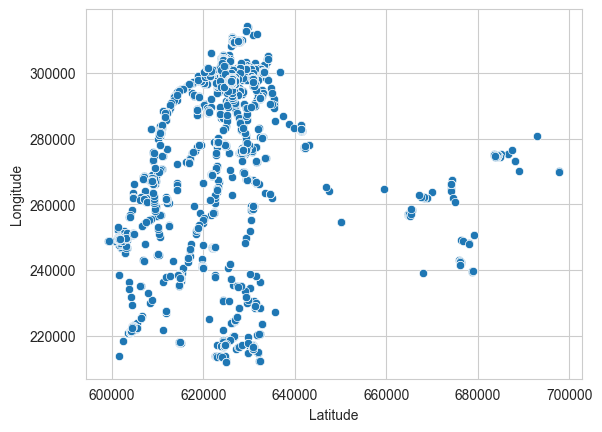

In [71]:
sns.scatterplot(mopsi_df, x='Latitude', y='Longitude')

In [79]:
ss.fit(mopsi_df.iloc[:, 0:])
transformed_mopsi_df = ss.transform(mopsi_df.iloc[:, 0:])

array([[0.11323554, 0.41347453],
       [0.13401564, 0.41352356],
       [0.13376067, 0.41430792],
       ...,
       [0.12177705, 0.41175874],
       [0.11476536, 0.41283724],
       [0.11310805, 0.41308235]])

In [78]:
eps_range = [i / 5 for i in range(1, 6)]
min_samples_range = [i * 4 for i in range(1, 7)]

get_dbscan_params(transformed_mopsi_df, eps_range, min_samples_range)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 Best parameters: {'eps': 1.0, 'min_samples': 4}
Best silhouette score: 0.8176681457975331


In [88]:
dbscan_mopsi = DBSCAN(eps=1, min_samples=4)
dbscan_mopsi.fit(transformed_mopsi_df)

DBSCAN(eps=1, min_samples=4)

In [ ]:
dbscan_mopsi.labels_

<Axes: xlabel='Latitude', ylabel='Longitude'>

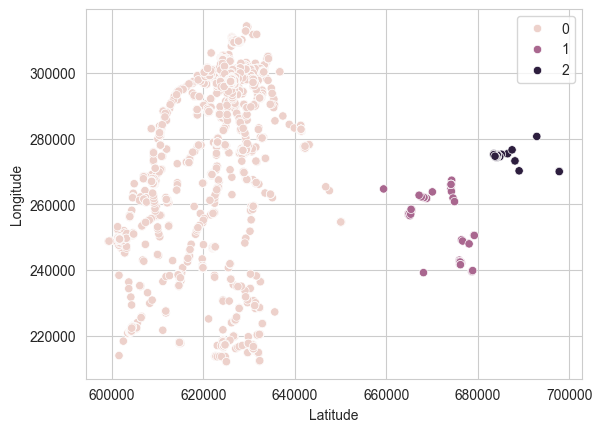

In [89]:
sns.scatterplot(mopsi_df, x='Latitude', y='Longitude', hue=dbscan_mopsi.labels_)

1. I choose to use DBSCAN for the Mopsi data because it is geospatial data, which DBSCAN does a good job analyzing.
2. I normalized the data and tuned the hyperparameters to find the best fit
3. The algorithm grouped locations into 3 groups. One main group ranging from latitude 60 to about 65, and longitude ranging from about 21 to 32. The second group is much smaller and ranges from about lat 66 to 68 and long 24 to 27. The third group ranges from about 68 to 70 lat and 27 to 28 long. I expected the two smaller groups to be their own clusters as they are pretty obviously not a part of the main group, but I did not know what to expect with the main cluster. Although it makes sense that it is one big group.
4. To analyze the performance, I used silhouette score. I fit 25 different models with varying eps and min samples, and selected the one with the best silhouette score. A score of .82 indicates a high degree of cohesion amongst the clusters.